Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Dimensions: (150, 4)

Reduced Dataset:
        PC1       PC2  Target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


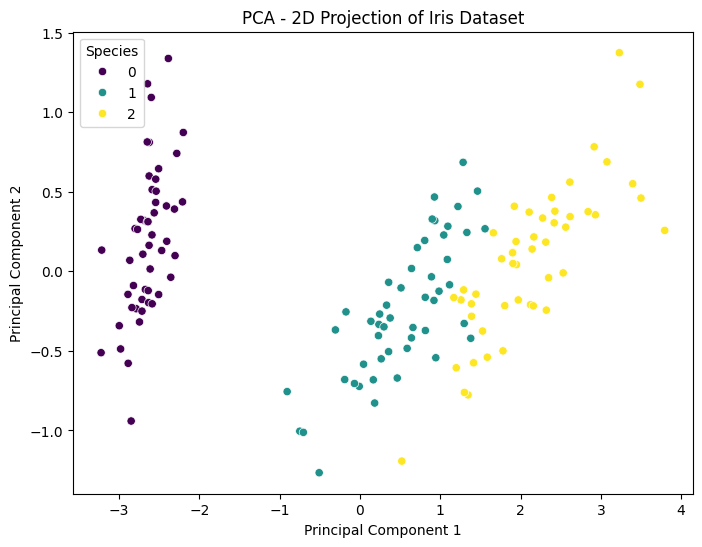

In [20]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Display first few rows
print("Dataset Sample:")
print(df.head())

# Check dataset dimensions
print("\nDataset Dimensions:", df.shape)

# Apply PCA to reduce dataset from 4D to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Convert to DataFrame for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = iris.target  # Add labels

print("\nReduced Dataset:")
print(df_pca.head())

# Plot PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Target'], palette='viridis')
plt.title("PCA - 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

Stock Data Sample:
              Open   Close   Volume
Date                               
2023-06-01  178.65  186.12  1158447
2023-06-02  209.08  215.18   903286
2023-06-05  153.05  152.84   915460
2023-06-06  153.73  154.90  1084574
2023-06-07  232.26  245.04   435365

Missing Values:
Open      0
Close     0
Volume    0
dtype: int64


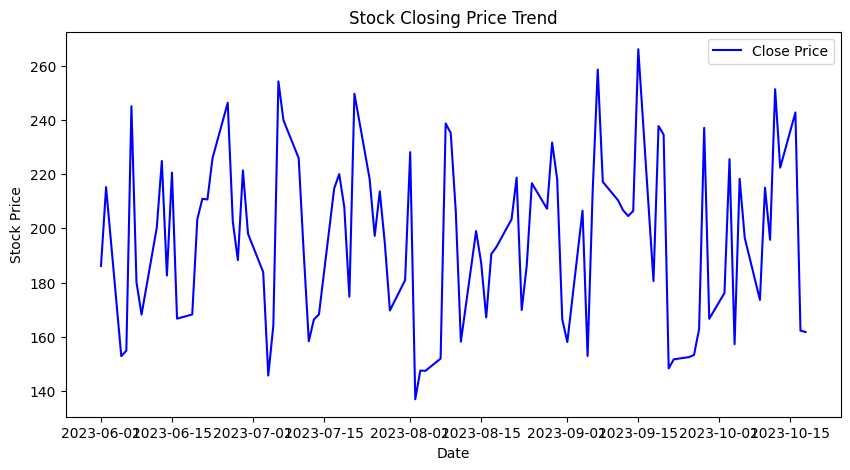

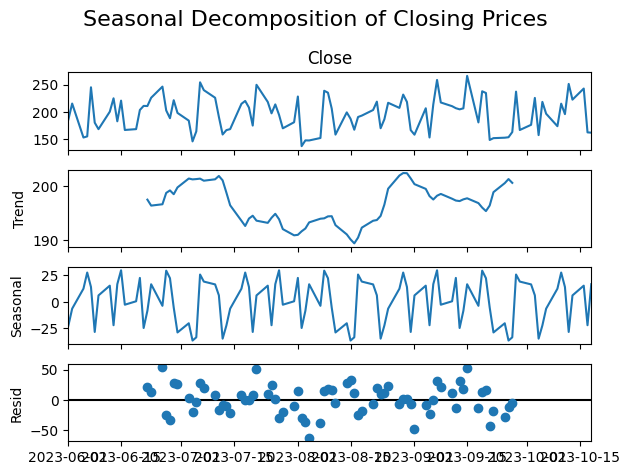


Dataset with Lag & Rolling Features:
              Open   Close   Volume  Prev_Close  Rolling_Mean
Date                                                         
2023-06-07  232.26  245.04   435365      154.90       190.816
2023-06-08  186.02  180.10   542786      245.04       189.612
2023-06-09  162.71  168.18  1299188      180.10       180.212
2023-06-12  202.22  200.20  1010006      168.18       189.684
2023-06-13  227.00  224.82   400244      200.20       203.668

Forecasted Prices:
2023-10-19    206.443717
2023-10-20    189.121037
2023-10-23    203.270252
2023-10-24    193.144497
2023-10-25    200.521656
2023-10-26    195.160631
2023-10-27    199.057916
2023-10-30    196.224864
2023-10-31    198.284308
2023-11-01    196.787228
Freq: B, Name: predicted_mean, dtype: float64

Evaluation Metrics:
MAE: 25.26
RMSE: 31.69
MAPE: 12.29%


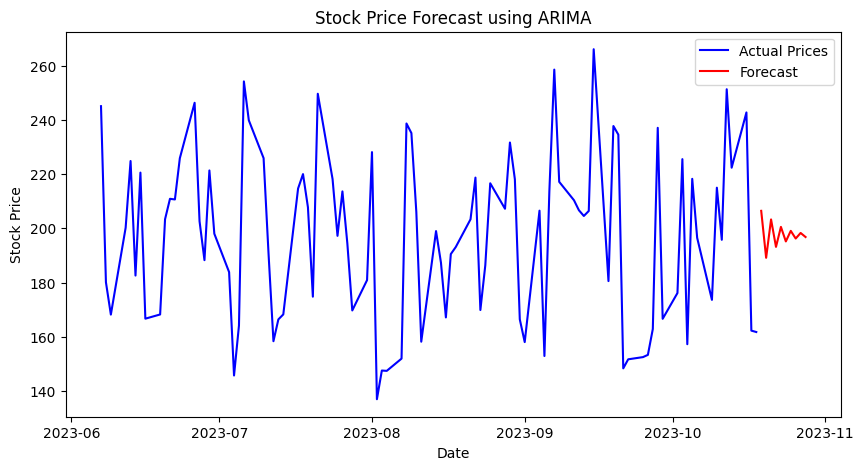

In [38]:
# Install necessary libraries (uncomment if needed)
# !pip install statsmodels scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Load stock prices dataset
df = pd.read_csv("stock_prices.csv")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.index.freq = 'B'  # Business day frequency

# Show first few rows
print("Stock Data Sample:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing if any
df.dropna(inplace=True)

# EDA — trend plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

# Decompose to analyze seasonality and trend
result = seasonal_decompose(df['Close'], model='additive', period=30)
result.plot()
plt.suptitle("Seasonal Decomposition of Closing Prices", fontsize=16)
plt.tight_layout()
plt.show()

# Feature Engineering — lag and rolling mean
df['Prev_Close'] = df['Close'].shift(1)
df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
df.dropna(inplace=True)

print("\nDataset with Lag & Rolling Features:")
print(df.head())

# Model — manual ARIMA order (reasonable default)
order = (2, 1, 2)  # chosen by experience
model = ARIMA(df['Close'], order=order)
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
print("\nForecasted Prices:")
print(forecast)

# Evaluation — compare with last 10 known
actual = df['Close'].iloc[-10:]
predicted = model_fit.predict(start=len(df)-10, end=len(df)-1, typ='levels')

# Ensure equal length
actual = actual[-len(predicted):]

# Calculate metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"\nEvaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Forecast plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Actual Prices", color='blue')
plt.plot(pd.date_range(start=df.index[-1], periods=11, freq='D')[1:], forecast, label="Forecast", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA")
plt.legend()
plt.show()


